In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
call = pd.read_csv('data/call.csv')
call_result = pd.read_csv('data/call_result.csv')
chain = pd.read_csv('data/chain.csv')
ft_call = pd.read_csv('data/ft_call.csv')
ft_subject = pd.read_csv('data/ft_subject.csv')
ranking_history = pd.read_csv('data/ranking_history.csv')
token = pd.read_csv('data/token.csv')
user = pd.read_csv('data/user.csv')

In [3]:
call

token_id                    start                   finish  user_id  \
0          4619  2024-01-12 20:20:23.759  2024-01-19 20:20:23.759       14   
1          4620  2024-01-12 20:42:01.441  2024-01-19 20:42:01.441       14   
2             1  2024-01-12 20:57:54.047  2024-05-11 20:57:54.047       14   
3          4621  2024-01-12 21:02:33.339  2024-01-19 21:02:33.339       14   
4          4622  2024-01-12 21:29:43.227  2024-01-19 21:29:43.227    42280   
...         ...                      ...                      ...      ...   
12436      3078  2023-10-27 20:19:55.808  2023-11-26 20:19:55.808      823   
12437      3049  2023-10-27 21:02:38.149  2023-11-26 21:02:38.149      279   
12438      3079  2023-10-27 21:05:06.377  2023-11-26 21:05:06.377      121   
12439      3080  2023-10-27 22:29:21.299  2023-11-26 22:29:21.299      841   
12440      3080  2023-10-27 22:29:57.699  2023-11-26 22:29:57.699     8374   

          id description call_type  group_id  
0      10405         NaN      meme       NaN  
1      10406         NaN      meme       NaN  
2      10407         NaN   utility       NaN  
3      10408         NaN      meme       NaN  
4      10409         NaN      meme       NaN  
...      ...         ...       ...       ...  
12436   7065         NaN  mid-term       NaN  
12437   7066         NaN  mid-term       NaN  
12438   7067         NaN  mid-term       NaN  
12439   7068         NaN  mid-term       NaN  
12440   7069         NaN  mid-term       NaN  

[12441 rows x 8 columns]

In [4]:
call_and_call_result = pd.merge(call, call_result, left_on='id', right_on='call_id', how='right')

In [5]:
ranking_history

id  user_id  place     score       rps  calls  wins  losses  \
0          1        1      1  0.061712  1.825756     11     2       0   
1          2      490      2  0.060465  2.145709     12     2       0   
2          3      174      3  0.051029  1.556843     18     3       0   
3          4      451      4  0.013120  1.801894     10     1       0   
4          5      281      5  0.010036  1.378252     10     1       0   
...      ...      ...    ...       ...       ...    ...   ...     ...   
38183  38184    23562    206  0.000000  0.482715     12     0      12   
38184  38185     1267    207  0.000000  0.698139     13     0      13   
38185  38186      516    208  0.000000  0.389623     15     0      15   
38186  38187      682    209  0.000000  0.446899     16     0      16   
38187  38188      591    210  0.000000  0.282813     25     0      25   

       percent  x10  x50  x100  max_win                 datetime  
0           18    0    0     0    614.0  2023-08-01 00:00:00.000  
1           16    0    0     0   1830.0  2023-08-01 00:00:00.000  
2           16    0    0     0   1083.0  2023-08-01 00:00:00.000  
3           10    0    0     0   1175.0  2023-08-01 00:00:00.000  
4           10    0    0     0   1831.0  2023-08-01 00:00:00.000  
...        ...  ...  ...   ...      ...                      ...  
38183        0    0    0     0      0.0  2024-04-01 00:00:00.000  
38184        0    0    0     0      0.0  2024-04-01 00:00:00.000  
38185        0    0    0     0      0.0  2024-04-01 00:00:00.000  
38186        0    0    0     0      0.0  2024-04-01 00:00:00.000  
38187        0    0    0     0      0.0  2024-04-01 00:00:00.000  

[38188 rows x 14 columns]

In [6]:
model_df = call_and_call_result.merge(ranking_history, on="user_id", how="inner")

In [7]:
pd.set_option('display.max_columns', 100)

In [8]:
model_df.win.value_counts()

win
False    888610
True     259640
Name: count, dtype: int64

In [9]:
model_df.to_csv("preprocess_data.csv", index=False)

In [10]:
model_df.head()

token_id                    start                   finish  user_id  id_x  \
0         1  2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8     1   
1         1  2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8     1   
2         1  2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8     1   
3         1  2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8     1   
4         1  2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8     1   

  description call_type  group_id  call_id  start_price  max_price  \
0         NaN  mid-term       NaN        1        0.118     0.7556   
1         NaN  mid-term       NaN        1        0.118     0.7556   
2         NaN  mid-term       NaN        1        0.118     0.7556   
3         NaN  mid-term       NaN        1        0.118     0.7556   
4         NaN  mid-term       NaN        1        0.118     0.7556   

   last_price   win  max_x  id_y  place     score       rps  calls  wins  \
0      0.4966  True    5.0    24     10  0.010268  1.410221     10     1   
1      0.4966  True    5.0    34      7  0.037862  1.343605     12     2   
2      0.4966  True    5.0    48      7  0.037730  1.338914     12     2   
3      0.4966  True    5.0    65      6  0.098605  1.502709     13     3   
4      0.4966  True    5.0    85      6  0.092873  1.415352     13     3   

   losses  percent  x10  x50  x100  max_win                 datetime  
0       0       10    0    0     0    481.0  2023-08-03 00:00:00.000  
1       0       16    0    0     0    481.0  2023-08-04 00:00:00.000  
2       0       16    0    0     0    481.0  2023-08-05 00:00:00.000  
3       0       23    0    0     0    481.0  2023-08-06 00:00:00.000  
4       0       23    0    0     0    481.0  2023-08-07 00:00:00.000

In [11]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148250 entries, 0 to 1148249
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   token_id     1148250 non-null  int64  
 1   start        1148250 non-null  object 
 2   finish       1148250 non-null  object 
 3   user_id      1148250 non-null  int64  
 4   id_x         1148250 non-null  int64  
 5   description  670 non-null      object 
 6   call_type    1148250 non-null  object 
 7   group_id     0 non-null        float64
 8   call_id      1148250 non-null  int64  
 9   start_price  1148250 non-null  float64
 10  max_price    1148250 non-null  float64
 11  last_price   1148250 non-null  float64
 12  win          1148250 non-null  bool   
 13  max_x        1097828 non-null  float64
 14  id_y         1148250 non-null  int64  
 15  place        1148250 non-null  int64  
 16  score        1148250 non-null  float64
 17  rps          1148250 non-null  float64
 18  ca

In [12]:
model_df.describe()

token_id       user_id          id_x  group_id       call_id  \
count  1.148250e+06  1.148250e+06  1.148250e+06       0.0  1.148250e+06   
mean   2.073850e+03  3.454432e+03  5.155006e+03       NaN  5.155006e+03   
std    1.458126e+03  7.773263e+03  3.167178e+03       NaN  3.167178e+03   
min    1.000000e+00  1.000000e+00  1.000000e+00       NaN  1.000000e+00   
25%    8.230000e+02  1.750000e+02  2.449000e+03       NaN  2.449000e+03   
50%    1.910000e+03  4.350000e+02  5.076000e+03       NaN  5.076000e+03   
75%    3.135000e+03  8.230000e+02  7.609000e+03       NaN  7.609000e+03   
max    5.878000e+03  5.241000e+04  1.217400e+04       NaN  1.217400e+04   

        start_price     max_price    last_price         max_x          id_y  \
count  1.148250e+06  1.148250e+06  1.148250e+06  1.097828e+06  1.148250e+06   
mean   3.124066e+18  1.869532e+19  1.792863e+18  1.529996e+14  1.838189e+04   
std    1.757614e+20  1.038507e+21  1.002987e+20  1.475684e+16  1.117241e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    4.904000e-05  7.357000e-05  3.143000e-06  0.000000e+00  8.484000e+03   
50%    7.057000e-04  1.456000e-03  7.570000e-05  0.000000e+00  1.811800e+04   
75%    1.980000e-02  4.256000e-02  3.923000e-03  0.000000e+00  2.805375e+04   
max    1.165878e+22  5.770673e+22  6.393979e+21  1.423451e+18  3.818800e+04   

              place         score           rps         calls          wins  \
count  1.148250e+06  1.148250e+06  1.148250e+06  1.148250e+06  1.148250e+06   
mean   8.049175e+01  2.348840e-01  1.756363e+00  4.365455e+01  9.780956e+00   
std    5.095823e+01  2.910298e-01  6.899277e-01  4.264252e+01  9.775389e+00   
min    1.000000e+00  0.000000e+00  2.735945e-01  1.000000e+01  0.000000e+00   
25%    3.900000e+01  5.859839e-02  1.332853e+00  1.700000e+01  4.000000e+00   
50%    7.500000e+01  1.494138e-01  1.700531e+00  2.800000e+01  6.000000e+00   
75%    1.160000e+02  2.925135e-01  2.088059e+00  5.300000e+01  1.200000e+01   
max    2.100000e+02  3.184849e+00  6.078521e+00  2.590000e+02  6.000000e+01   

             losses       percent           x10           x50          x100  \
count  1.148250e+06  1.148250e+06  1.148250e+06  1.148250e+06  1.148250e+06   
mean   2.665429e+01  2.221182e+01  1.109710e+00  1.786327e-01  1.170938e-01   
std    2.762474e+01  9.842795e+00  1.446751e+00  4.257292e-01  3.215322e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.000000e+00  1.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.700000e+01  2.200000e+01  1.000000e+00  0.000000e+00  0.000000e+00   
75%    3.700000e+01  2.800000e+01  2.000000e+00  0.000000e+00  0.000000e+00   
max    1.710000e+02  6.600000e+01  7.000000e+00  2.000000e+00  1.000000e+00   

            max_win  
count  1.148250e+06  
mean   5.737432e+03  
std    9.788775e+03  
min    0.000000e+00  
25%    9.450000e+02  
50%    2.342000e+03  
75%    7.912000e+03  
max    7.521500e+04

The dataset consists of 4,926 entries and 26 columns, including numerical, boolean, and object (string and datetime) types. Here's a brief overview of its structure and some key observations:

- Columns Overview: The dataset includes a range of data types and appears to focus on some form of transaction or event data, indicated by columns such as start, finish, user_id, call_type, start_price, max_price, last_price, and win. There are columns for IDs (token_id, user_id, id, call_id), prices (start_price, max_price, last_price, max_win), performance metrics (score, rps, calls, wins, losses, percent), and multipliers (x10, x50, x100).
- Missing Data: The description and group_id columns are completely null. The max_x column has some missing values (about 200 entries).
- Boolean Data: The win column is a boolean, indicating a binary outcome for each record.
- Date/Time Data: The start, finish, and datetime columns are in a datetime format, showing the start and finish times of each event.
- Numerical Data: Includes a variety of metrics, from IDs to prices, performance scores, and counters for specific events (e.g., calls, wins, losses).

import matplotlib.pyplot as plt
import seaborn as sns

data['start'] = pd.to_datetime(data['start'])
data['datetime'] = pd.to_datetime(data['datetime'])

fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(data['start_price'], bins=30, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Distribution of Start Price')

sns.histplot(data['max_price'], bins=30, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Distribution of Max Price')

sns.histplot(data['score'], bins=30, ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Distribution of Score')

sns.histplot(data['rps'], bins=30, ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Distribution of RPS')

sns.histplot(data['wins'], bins=30, ax=axs[2, 0], kde=True)
axs[2, 0].set_title('Distribution of Wins')

sns.histplot(data['losses'], bins=30, ax=axs[2, 1], kde=True)
axs[2, 1].set_title('Distribution of Losses')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
data.resample('W', on='start').size().plot(label='Weekly Counts', color='blue')
plt.title('Time Series - Weekly Counts of Events')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()


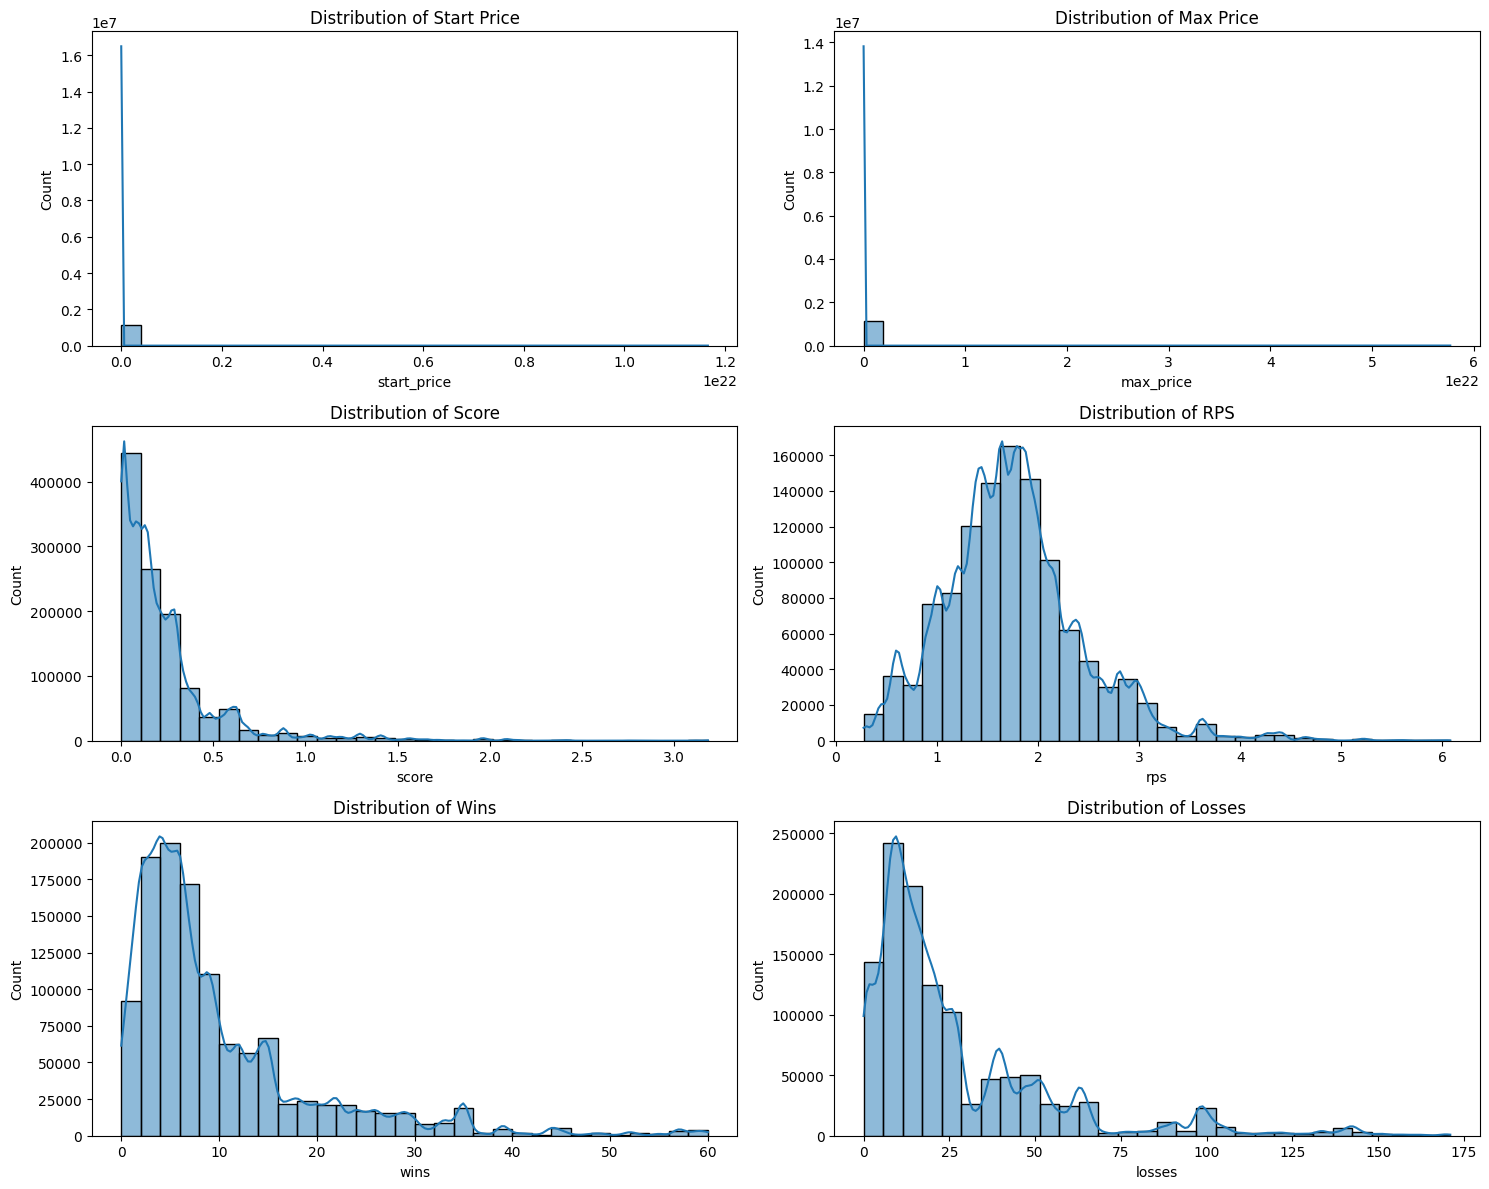

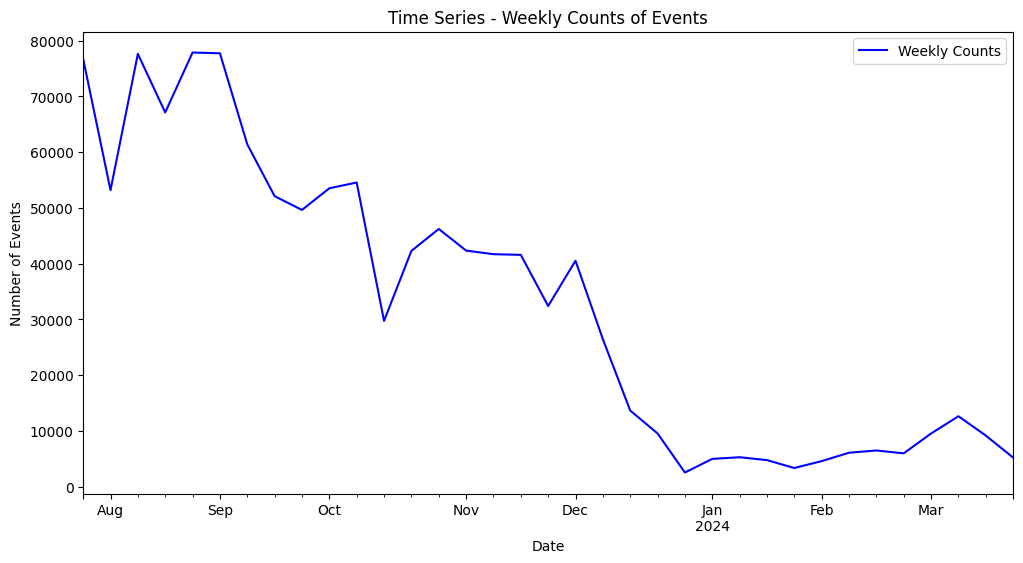

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


data = model_df.copy()

data['start'] = pd.to_datetime(data['start'])
data['datetime'] = pd.to_datetime(data['datetime'])

fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(data['start_price'], bins=30, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Distribution of Start Price')

sns.histplot(data['max_price'], bins=30, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Distribution of Max Price')

sns.histplot(data['score'], bins=30, ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Distribution of Score')

sns.histplot(data['rps'], bins=30, ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Distribution of RPS')

sns.histplot(data['wins'], bins=30, ax=axs[2, 0], kde=True)
axs[2, 0].set_title('Distribution of Wins')

sns.histplot(data['losses'], bins=30, ax=axs[2, 1], kde=True)
axs[2, 1].set_title('Distribution of Losses')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
data.resample('W', on='start').size().plot(label='Weekly Counts', color='blue')
plt.title('Time Series - Weekly Counts of Events')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

In [15]:
data

token_id                   start                   finish  user_id  \
0               1 2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8   
1               1 2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8   
2               1 2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8   
3               1 2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8   
4               1 2023-07-25 20:33:56.401  2023-08-24 20:33:56.401        8   
...           ...                     ...                      ...      ...   
1148245      5878 2024-03-24 17:24:41.115  2024-03-31 17:24:41.115     3303   
1148246      5878 2024-03-24 17:24:41.115  2024-03-31 17:24:41.115     3303   
1148247      5878 2024-03-24 17:24:41.115  2024-03-31 17:24:41.115     3303   
1148248      5878 2024-03-24 17:24:41.115  2024-03-31 17:24:41.115     3303   
1148249      5878 2024-03-24 17:24:41.115  2024-03-31 17:24:41.115     3303   

          id_x description call_type  group_id  call_id   start_price  \
0            1         NaN  mid-term       NaN        1  1.180000e-01   
1            1         NaN  mid-term       NaN        1  1.180000e-01   
2            1         NaN  mid-term       NaN        1  1.180000e-01   
3            1         NaN  mid-term       NaN        1  1.180000e-01   
4            1         NaN  mid-term       NaN        1  1.180000e-01   
...        ...         ...       ...       ...      ...           ...   
1148245  12174         NaN      meme       NaN    12174  6.565000e-10   
1148246  12174         NaN      meme       NaN    12174  6.565000e-10   
1148247  12174         NaN      meme       NaN    12174  6.565000e-10   
1148248  12174         NaN      meme       NaN    12174  6.565000e-10   
1148249  12174         NaN      meme       NaN    12174  6.565000e-10   

            max_price    last_price    win  max_x   id_y  place     score  \
0        7.556000e-01  4.966000e-01   True    5.0     24     10  0.010268   
1        7.556000e-01  4.966000e-01   True    5.0     34      7  0.037862   
2        7.556000e-01  4.966000e-01   True    5.0     48      7  0.037730   
3        7.556000e-01  4.966000e-01   True    5.0     65      6  0.098605   
4        7.556000e-01  4.966000e-01   True    5.0     85      6  0.092873   
...               ...           ...    ...    ...    ...    ...       ...   
1148245  1.146000e-09  1.400000e-11  False    0.0  37304    163  0.030823   
1148246  1.146000e-09  1.400000e-11  False    0.0  37513    163  0.029357   
1148247  1.146000e-09  1.400000e-11  False    0.0  37723    164  0.029010   
1148248  1.146000e-09  1.400000e-11  False    0.0  37913    145  0.061609   
1148249  1.146000e-09  1.400000e-11  False    0.0  38121    143  0.062490   

              rps  calls  wins  losses  percent  x10  x50  x100  max_win  \
0        1.410221     10     1       0       10    0    0     0    481.0   
1        1.343605     12     2       0       16    0    0     0    481.0   
2        1.338914     12     2       0       16    0    0     0    481.0   
3        1.502709     13     3       0       23    0    0     0    481.0   
4        1.415352     13     3       0       23    0    0     0    481.0   
...           ...    ...   ...     ...      ...  ...  ...   ...      ...   
1148245  1.056693     19     3      12       15    1    0     0   1807.0   
1148246  1.124554     20     3      12       15    1    0     0   1807.0   
1148247  1.111252     20     3      12       15    1    0     0   1807.0   
1148248  1.149647     20     4      12       20    1    0     0   1807.0   
1148249  1.166099     20     4      12       20    1    0     0   1807.0   

          datetime  
0       2023-08-03  
1       2023-08-04  
2       2023-08-05  
3       2023-08-06  
4       2023-08-07  
...            ...  
1148245 2024-03-28  
1148246 2024-03-29  
1148247 2024-03-30  
1148248 2024-03-31  
1148249 2024-04-01  

[1148250 rows x 27 columns]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

relevant_data = data.drop(['description', 'group_id', 'token_id', 'user_id', 'id_x', 'call_id', 'datetime'], axis=1)

label_encoder = LabelEncoder()
relevant_data['call_type'] = label_encoder.fit_transform(relevant_data['call_type'])

relevant_data['start_year'] = data['start'].dt.year
relevant_data['start_month'] = data['start'].dt.month
relevant_data['start_day'] = data['start'].dt.day
relevant_data['duration'] = (pd.to_datetime(data['finish']) - data['start']).dt.total_seconds()

relevant_data['max_x'] = relevant_data['max_x'].fillna(relevant_data['max_x'].median())

relevant_data = relevant_data.drop(['start', 'finish', 'max_x', 'start_price', 'max_price'], axis=1)

X = relevant_data.drop('win', axis=1)
y = relevant_data['win']

# Time-related features
X['start_hour'] = data['start'].dt.hour
X['day_of_week'] = data['start'].dt.dayofweek

score_bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X['score_binned'] = score_bins.fit_transform(X[['score']])

X = X.drop(['score', 'duration'], axis=1)
print(X.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

call_type       0
last_price      0
id_y            0
place           0
rps             0
calls           0
wins            0
losses          0
percent         0
x10             0
x50             0
x100            0
max_win         0
start_year      0
start_month     0
start_day       0
start_hour      0
day_of_week     0
score_binned    0
dtype: int64


((688950, 19), (459300, 19), (688950,), (459300,))

In [21]:
import numpy as np

X_train = np.nan_to_num(X_train, nan=0.0, posinf=1e+10, neginf=-1e+10)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=1e+10, neginf=-1e+10)

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# apply cross validation
from sklearn.model_selection import cross_val_score

model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=4, loss_function='Logloss', eval_metric='AUC', verbose=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_proba))

y_pred_train = model.predict(X_train)
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(roc_auc_score(y_train, y_pred_proba_train))

0:	total: 45ms	remaining: 44.9s
200:	total: 5.23s	remaining: 20.8s
400:	total: 10.6s	remaining: 15.8s
600:	total: 16s	remaining: 10.6s
800:	total: 21.4s	remaining: 5.31s
999:	total: 26.6s	remaining: 0us
              precision    recall  f1-score   support

       False       0.81      0.98      0.89    355444
        True       0.80      0.22      0.35    103856

    accuracy                           0.81    459300
   macro avg       0.81      0.60      0.62    459300
weighted avg       0.81      0.81      0.77    459300

[[349893   5551]
 [ 80970  22886]]
0.8058768442486425
              precision    recall  f1-score   support

       False       0.81      0.98      0.89    533166
        True       0.81      0.22      0.34    155784

    accuracy                           0.81    688950
   macro avg       0.81      0.60      0.62    688950
weighted avg       0.81      0.81      0.77    688950

[[524893   8273]
 [121609  34175]]
0.8053420965544085


Text(0.5, 1.0, 'Feature Importance')

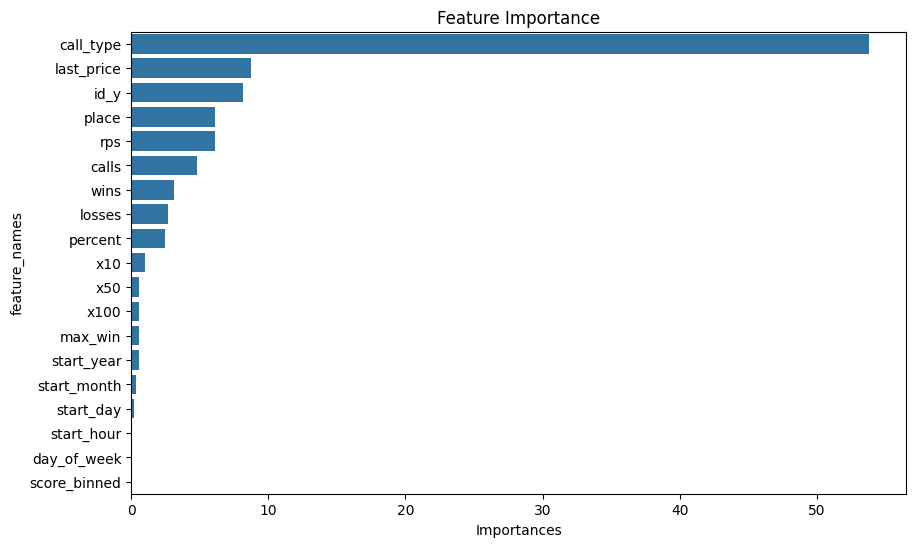

In [22]:
# feature importance with feature names
feature_importance = model.get_feature_importance(prettified=True)
feature_importance['feature_names'] = X.columns

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importances', y='feature_names')
plt.title('Feature Importance')

In [25]:
# plot correlation matrix
relevant_data.corr().to_markdown()

'|             |    call_type |   start_price |   max_price |   last_price |         win |       place |       score |         rps |       calls |         wins |      losses |     percent |         x10 |         x50 |       x100 |     max_win |   start_year |   start_month |   start_day |     duration |\n|:------------|-------------:|--------------:|------------:|-------------:|------------:|------------:|------------:|------------:|------------:|-------------:|------------:|------------:|------------:|------------:|-----------:|------------:|-------------:|--------------:|------------:|-------------:|\n| call_type   |  1           |  -0.0647731   | -0.0655904  | -0.0651253   |  0.0848944  | -0.00131864 |  0.00255227 | -0.0292431  | -0.0062466  |  0.000528507 |  0.0305377  |  0.00828975 | -0.0432412  |  0.0170898  | -0.0415272 |  0.0163039  | -0.0803397   |    -0.461574  |  0.0493323  |  0.999199    |\n| start_price | -0.0647731   |   1           |  0.987539   |  0.999245    |  0.00936

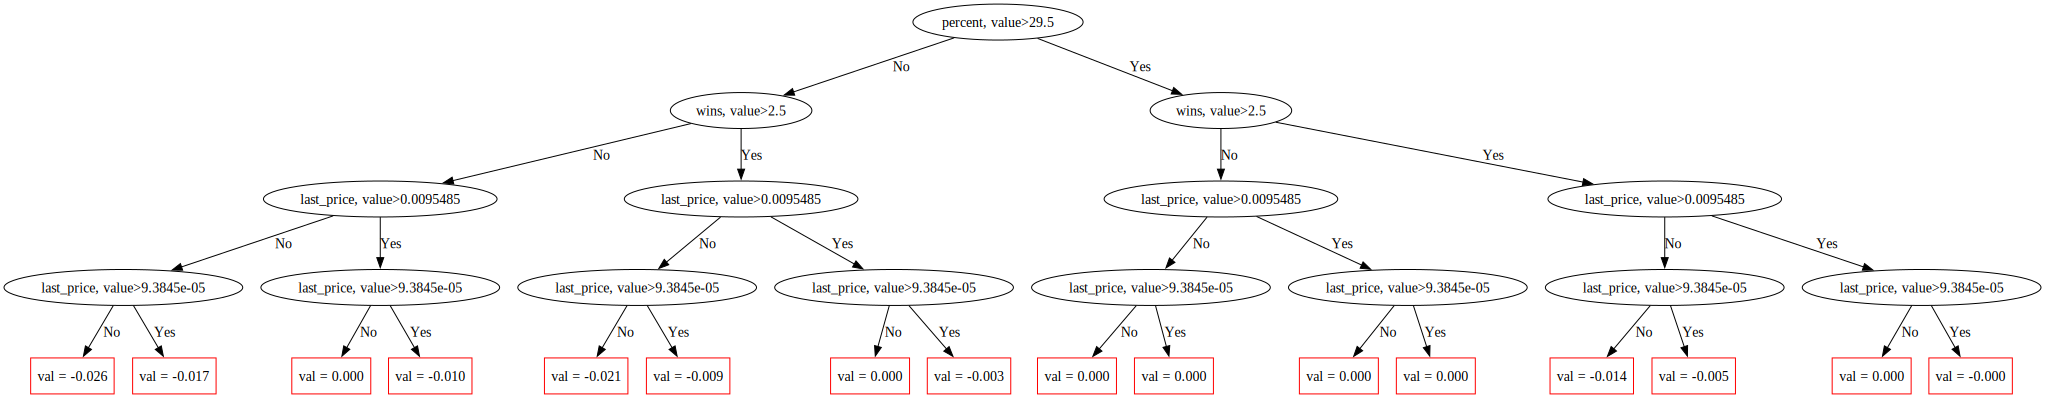

In [23]:
# show tree from catboost with feature names
model.plot_tree(tree_idx=0, pool=X)

In [24]:
# give average portrait of win and loss
average_win = relevant_data[relevant_data['win'] == 1].median()
average_loss = relevant_data[relevant_data['win'] == 0].median()

average_loss

call_type      1.000000e+00
last_price     3.441000e-05
win            0.000000e+00
id_y           1.812800e+04
place          7.900000e+01
score          1.364937e-01
rps            1.654711e+00
calls          2.800000e+01
wins           6.000000e+00
losses         1.700000e+01
percent        2.100000e+01
x10            1.000000e+00
x50            0.000000e+00
x100           0.000000e+00
max_win        2.335000e+03
start_year     2.023000e+03
start_month    9.000000e+00
start_day      1.600000e+01
duration       2.592000e+06
dtype: float64

In [25]:
average_win

call_type      1.000000e+00
last_price     1.999000e-03
win            1.000000e+00
id_y           1.807600e+04
place          5.800000e+01
score          2.153224e-01
rps            1.817894e+00
calls          2.900000e+01
wins           7.000000e+00
losses         1.600000e+01
percent        2.500000e+01
x10            1.000000e+00
x50            0.000000e+00
x100           0.000000e+00
max_win        2.503000e+03
start_year     2.023000e+03
start_month    9.000000e+00
start_day      1.700000e+01
duration       2.592000e+06
dtype: float64

In [26]:
X.columns

Index(['call_type', 'last_price', 'id_y', 'place', 'rps', 'calls', 'wins',
       'losses', 'percent', 'x10', 'x50', 'x100', 'max_win', 'start_year',
       'start_month', 'start_day', 'start_hour', 'day_of_week',
       'score_binned'],
      dtype='object')